In [27]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('DOH COVID Data Drop - Case Information.csv')

In [41]:
# DATA PROFILING
# data profiling can only be applied to age because it is the only attribute with numeric data type
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CaseCode           1000000 non-null  object        
 1   Age                999815 non-null   float64       
 2   AgeGroup           999815 non-null   object        
 3   Sex                1000000 non-null  object        
 4   DateSpecimen       832906 non-null   object        
 5   DateResultRelease  833423 non-null   object        
 6   DateRepConf        1000000 non-null  datetime64[ns]
 7   DateDied           16563 non-null    object        
 8   DateRecover        135903 non-null   object        
 9   RemovalType        996384 non-null   object        
 10  Admitted           429156 non-null   object        
 11  RegionRes          999995 non-null   object        
 12  ProvRes            995936 non-null   object        
 13  CityMunRes         993920 no

In [34]:
# MEASURING COMPLETENESS

# Get count of values of BarangayRes
barangay_res_count = df[['BarangayRes']].count()

# Compute completion percentage
print(round((barangay_res_count / 1000000) * 100, 2))
print()

# Filter only april to sept
df['DateRepConf'] = pd.to_datetime(df['DateRepConf'], format='%Y-%m-%d')
filtered_df = df.loc[(df['DateRepConf'] >= '2021-04-01') & (df['DateRepConf'] <= '2021-09-30')]
filtered_df['month'] = filtered_df['DateRepConf'].dt.month

# create april - sept record completeness table
months = [4, 5, 6, 7, 8, 9]
time_series = pd.DataFrame({'month': months})
record_completeness = []

for i in months:
    col = filtered_df[filtered_df['month'] == i]
    percent = col['BarangayRes'].notnull().sum() * 100 / len(col['BarangayRes'])
    record_completeness.append(percent)
    
time_series['record completeness'] = record_completeness
time_series


BarangayRes    97.79
dtype: float64



,month,record completeness
0,4,97.803153
1,5,97.935581
2,6,97.808801
3,7,97.614946
4,8,97.804275
5,9,97.318990


<AxesSubplot:xlabel='month', ylabel='record completeness'>

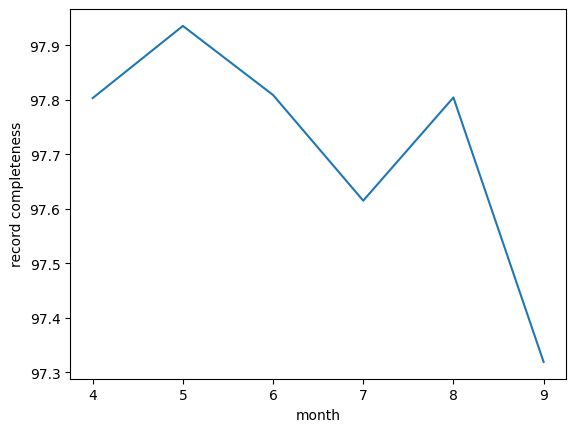

In [35]:
# create time series graph
sns.lineplot(data=time_series, x='month', y='record completeness')

In [ ]:
# DATA QUALITY STRATEGY
'''
The DOH COVID Health Data contains data of people who got infected by COVID from April to September. The age attribute was used to create a profile of the people in the data set. There were 185 null rows, a mean age of 38.21, a median of 35, standard deviation of 18.48, a minimum age of 0, and maximum age of 107. Based on the values of the median and mode, it can be assumed that the age of people in the data set is negatively skewed, meaning that there is more data on people who are older. Based on the business context as well, it can also be assumed that the data is incomplete, and could further be organized.

For the data strategy, I suggest to make sure to get data of people from all ages. This way, the distribution of the data would be more normal. I also suggest to take the "asymptomatic" data cell out of health status because being asymptomatic is a different category from "Recovered" or "Died". We could add an attribute called symptoms and merge the "Admitted" attribute with the "Health Status" attribtue. In this way, DOH would be able to benefit more from relevant attributes, and a more organized data set. The "Health Status" attribtue would contain "Recovered", "Died", and "Hospitalized", while the "Symptoms" attribute would contain "Asymptomatic", and the symptroms that the patient experienced.
'''